# Loading Dataset

The datasets for each year had the following number of entries for bankrupt data.
So, lets segregate the bankrupt_companies and stable_companies at the end of each year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
    
year_1 = arff.loadarff('./data/1year.arff')
year_1 = pd.DataFrame(year_1[0])
year_1.insert(64, 'Bankruptcy_year','1')

year_2 = arff.loadarff('./data/2year.arff')
year_2 = pd.DataFrame(year_2[0])
year_2.insert(64, 'Bankruptcy_year','2')

year_3 = arff.loadarff('./data/3year.arff')
year_3 = pd.DataFrame(year_3[0])
year_3.insert(64, 'Bankruptcy_year','3')

year_4 = arff.loadarff('./data/4year.arff')
year_4 = pd.DataFrame(year_4[0])
year_4.insert(64, 'Bankruptcy_year','4')

year_5 = arff.loadarff('./data/5year.arff')
year_5 = pd.DataFrame(year_5[0])
year_5.insert(64, 'Bankruptcy_year','5')

year_5.head()

Attr1    Attr2    Attr3   Attr4     Attr5     Attr6     Attr7    Attr8  \
0  0.088238  0.55472  0.01134  1.0205  -66.5200  0.342040  0.109490  0.57752   
1 -0.006202  0.48465  0.23298  1.5998    6.1825  0.000000 -0.006202  1.06340   
2  0.130240  0.22142  0.57751  3.6082  120.0400  0.187640  0.162120  3.05900   
3 -0.089951  0.88700  0.26927  1.5222  -55.9920 -0.073957 -0.089951  0.12740   
4  0.048179  0.55041  0.10765  1.2437  -22.9590  0.000000  0.059280  0.81682   

    Attr9   Attr10  ...      Attr57   Attr58    Attr59   Attr60  Attr61  \
0  1.0881  0.32036  ...    0.275430  0.91905  0.002024   7.2711  4.7343   
1  1.2757  0.51535  ...   -0.012035  1.00470  0.152220   6.0911  3.2749   
2  1.1415  0.67731  ...    0.192290  0.87604  0.000000   8.7934  2.9870   
3  1.2754  0.11300  ...   -0.796020  0.59074  2.878700   7.6524  3.3302   
4  1.5150  0.44959  ...    0.107160  0.77048  0.139380  10.1180  4.0950   

    Attr62  Attr63  Attr64  Bankruptcy_year  class  
0  142.760  2.5568  3.2597                5      0  
1  111.140  3.2841  3.3700                5      0  
2   71.531  5.1027  5.6188                5      0  
3  147.560  2.4735  5.9299                5      0  
4  106.430  3.4294  3.3622                5      0  

[5 rows x 66 columns]

Notice that the number of columns in each dataframe is same(65), hence, we can combine all the dataset to a large single dataset.
Also, we drop the duplicates in the datasets.
In case of multiple year datasets, its better to combine the data altogether in a single dataframe.

In [2]:
datasets = [year_1, year_2, year_3, year_4, year_5]
dataframe = pd.concat(datasets, axis=0).drop_duplicates().reset_index(drop=True)
dataframe.shape

(43004, 66)

In [3]:
dataframe.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...     Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...    0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...    0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...    0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...    0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...    0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  Bankruptcy_year  class  
0   82.658  4.4158   7.4277                1      0  
1  107.350  3.4000  60.9870                1      0  
2  134.270  2.7185   5.2078                1      0  
3   86.435  4.2228   5.5497                1      0  
4  127.210  2.8692   7.8980                1      0  

[5 rows x 66 columns]

# Handling Missing Values


Seperating the numerical and categorical data.

In [4]:
dataframe._get_numeric_data

<bound method DataFrame._get_numeric_data of           Attr1     Attr2     Attr3     Attr4         Attr5     Attr6  \
0      0.200550  0.379510  0.396410   2.04720  3.235100e+01  0.388250   
1      0.209120  0.499880  0.472250   1.94470  1.478600e+01  0.000000   
2      0.248660  0.695920  0.267130   1.55480 -1.152300e+00  0.000000   
3      0.081483  0.307340  0.458790   2.49280  5.195200e+01  0.149880   
4      0.187320  0.613230  0.229600   1.40630 -7.312800e+00  0.187320   
5      0.228220  0.497940  0.359690   1.75020 -4.771700e+01  0.000000   
6      0.111090  0.647440  0.289710   1.47050  2.534900e+00  0.000000   
7      0.532320  0.027059  0.705540  53.95400  2.995800e+02  0.000000   
8      0.009020  0.632020  0.053735   1.12630 -3.784200e+01  0.000000   
9      0.124080  0.838370  0.142040   1.16940 -9.188300e+01  0.000000   
10     0.240010  0.443550  0.188350   1.44000 -2.116500e+01 -0.931900   
11    -0.027117  0.111480  0.119890   2.07540 -3.164300e+01 -0.084883   
12    

Notice the number of rows and columns in the result.It has 65 columns.
Hence, there are no categorical data and only numerical features.

In [5]:
from sklearn.preprocessing import Imputer

# replacing '?' with NaN
dataframe = dataframe.replace('?', np.NaN)

# imputing NaN with median
imp_mean = Imputer(missing_values=np.NaN, strategy='median', axis=1)
imputed_dataframe = pd.DataFrame(imp_mean.fit_transform(dataframe))
imputed_dataframe.columns = dataframe.columns 
imputed_dataframe.index = dataframe.index

print(imputed_dataframe.isnull().values.any())
imputed_dataframe.shape

False


(43004, 66)

# EDA

The columns _Attr1,Attr2,Attr3,Attr4,Attr48,Attr49_ seem to be important as they represent the following :
* net profit / total assets 
* total liabilities / total assets 
* working capital / total assets
* current assets / short-term liabilities
* (profit on operating activities - depreciation) / total assets 
* (profit on operating activities - depreciation) / sales 

Except for _Attr55_ and _Attr62_, all the other features have values in a range.

### BOXPLOTS

In [6]:
columns = ['Attr1','Attr2','Attr3','Attr4','Attr48','Attr49','Attr53','Attr62']
for i in columns:
    print(imputed_dataframe[i].max(), imputed_dataframe[i].min())

(94.280000000000001, -463.88999999999999)
(480.95999999999998, -430.87)
(28.335999999999999, -479.95999999999998)
(53433.0, -0.40311000000000002)
(623.85000000000002, -542.55999999999995)
(178.88999999999999, -9001.0)
(180440.0, -3828.9000000000001)
(25016000.0, -2336500.0)


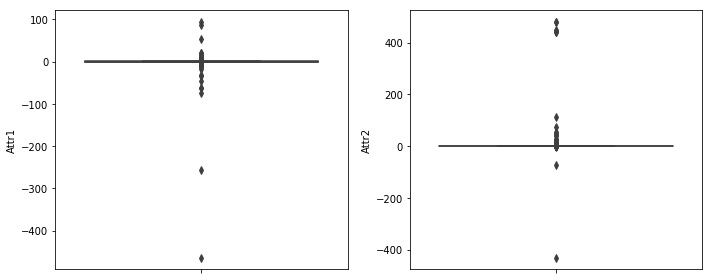

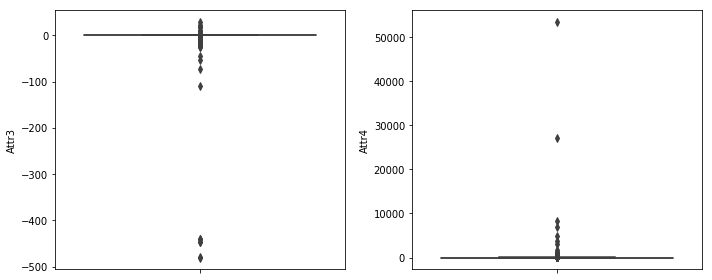

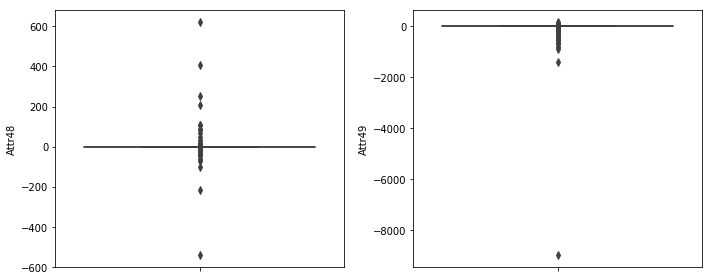

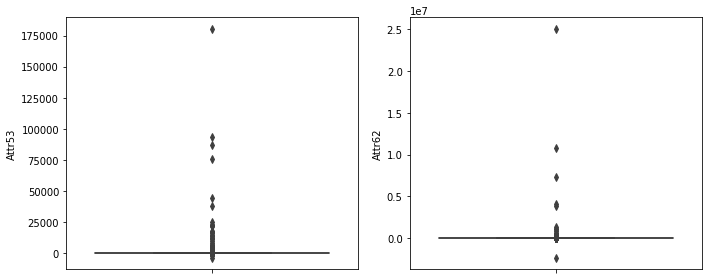

In [7]:
facet = None
for i in range(0,len(columns),2):
    if len(columns) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, columns[i],data = imputed_dataframe)
        plt.subplot(122)            
        sns.boxplot(facet, columns[i+1],data = imputed_dataframe)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = imputed_dataframe)

In [8]:
# Removing the outliers

# imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['X1']<-400)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['Attr2']>400)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['Attr3']<-300)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['Attr4']>50000)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['Attr48']>600) | (imputed_dataframe['Attr48']<-600)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['Attr49']<-8000)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['Attr53']>50000)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['Attr62']>2016000.0) | (imputed_dataframe['Attr48']<-1536500.0)].index)
imputed_dataframe.shape

(42987, 66)

### HEATMAP

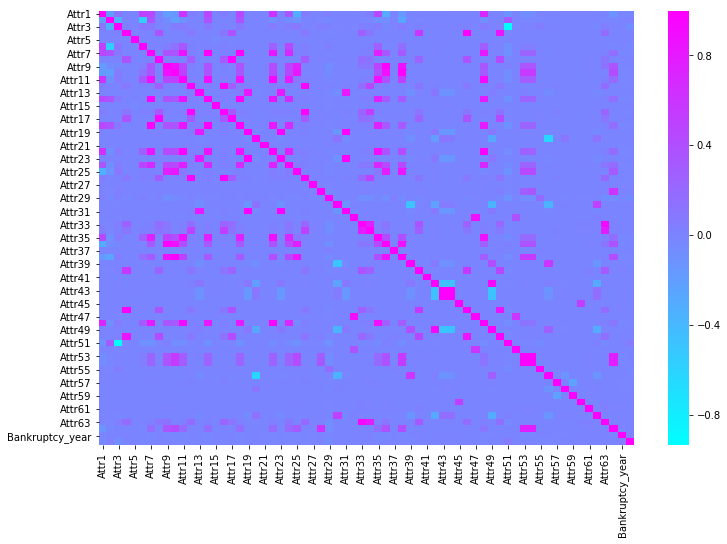

(42987, 66)

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(imputed_dataframe.corr(), cmap='cool')
plt.show()
imputed_dataframe.shape

There are too many **DARK PINK** patches showing highly positive correlation.
Similarily, there are many **LIGHT BLUISH** patches indicating higly negative correlatioin.

It is very much required to remove these highly correlated data.
Columns Attr53,Attr9,Attr43,Attr35 and Attr37 seem to have high correlation with most of the other columns.

So, lets drop them.

In [10]:
columns_to_drop = ['Attr53', 'Attr35', 'Attr9', 'Attr37', 'Attr43']
for i in columns_to_drop:
    imputed_dataframe = imputed_dataframe.drop(i, axis=1)
imputed_dataframe.shape

(42987, 61)

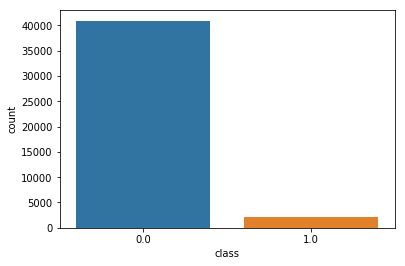

In [11]:
sns.countplot(x='class', data=imputed_dataframe)
plt.show()

As evident the dataset is heavily imbalanced, we need to balance out the data, otherwise our model may not learn enough properties, suffer overfitting and hence perform poorly. 
We will balance the dataset below, when we seperate the features and the prediction class.

Standardization is necessary as some columns are in % and some are in $, whereas some are in years.

In [12]:
imputed_dataframe.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr10    Attr11  ...     Attr57   Attr58    Attr59  Attr60  Attr61  \
0  0.50494  0.249760  ...    0.39718  0.87804  0.001924  8.4160  5.1372   
1  0.49788  0.261140  ...    0.42002  0.85300  0.000000  4.1486  3.2732   
2  0.30408  0.312580  ...    0.81774  0.76599  0.694840  4.9909  3.9510   
3  0.57353  0.092704  ...    0.14207  0.94598  0.000000  4.5746  3.6147   
4  0.38677  0.187320  ...    0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  Bankruptcy_year  class  
0   82.658  4.4158   7.4277              1.0    0.0  
1  107.350  3.4000  60.9870              1.0    0.0  
2  134.270  2.7185   5.2078              1.0    0.0  
3   86.435  4.2228   5.5497              1.0    0.0  
4  127.210  2.8692   7.8980              1.0    0.0  

[5 rows x 61 columns]

# Feature Engineering

###  Interaction Features

The capital of a business which is used in its day-to-day trading operations, calculated as the current assets minus the current liabilities.
* Attr55 : working capital
* Attr4 : current assets

So, a new feature **current liabilities** can be added.  

#### Attr10 and Attr25 can be combined to get a new feature share capital/total assets.

In [13]:
new_col = pd.Series(imputed_dataframe['Attr10'] - imputed_dataframe['Attr25'], 
                                           index=imputed_dataframe.index)
imputed_dataframe.insert(59, 'Attr65', new_col)
imputed_dataframe.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr10    Attr11  ...     Attr58    Attr59  Attr60  Attr61   Attr62  \
0  0.50494  0.249760  ...    0.87804  0.001924  8.4160  5.1372   82.658   
1  0.49788  0.261140  ...    0.85300  0.000000  4.1486  3.2732  107.350   
2  0.30408  0.312580  ...    0.76599  0.694840  4.9909  3.9510  134.270   
3  0.57353  0.092704  ...    0.94598  0.000000  4.5746  3.6147   86.435   
4  0.38677  0.187320  ...    0.86515  0.124440  6.3985  4.3158  127.210   

   Attr63   Attr64   Attr65  Bankruptcy_year  class  
0  4.4158   7.4277  0.00000              1.0    0.0  
1  3.4000  60.9870  0.10246              1.0    0.0  
2  2.7185   5.2078  0.01476              1.0    0.0  
3  4.2228   5.5497  0.00000              1.0    0.0  
4  2.8692   7.8980  0.00000              1.0    0.0  

[5 rows x 62 columns]

In [14]:
imputed_dataframe.skew()

Attr1             -136.143784
Attr2             -145.193229
Attr3              -59.941226
Attr4              156.116765
Attr5             -171.681854
Attr6               32.454025
Attr7              -25.375162
Attr8               84.000720
Attr10              70.072958
Attr11              12.599973
Attr12              56.332604
Attr13             116.385472
Attr14             -25.375170
Attr15              15.824212
Attr16              58.647201
Attr17              83.253557
Attr18             -24.747113
Attr19             176.023006
Attr20              88.048881
Attr21             120.674133
Attr22              16.216147
Attr23             179.950112
Attr24              45.068285
Attr25             101.915874
Attr26              59.216642
Attr27              73.922065
Attr28              89.891257
Attr29              -0.076353
Attr30              75.871455
Attr31             176.911425
                      ...    
Attr34              94.593388
Attr36              84.182202
Attr38    

In [15]:
# Removing skewness in the data
imputed_dataframe.apply(np.log)

Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
0     -1.606692 -0.968874 -0.925306  0.716473  3.476645 -0.946106 -1.387255   
1     -1.564847 -0.693387 -0.750247  0.665108  2.693681      -inf -1.353479   
2     -1.391669 -0.362521 -1.320020  0.441347       NaN      -inf -1.174220   
3     -2.507361 -1.179801 -0.779163  0.913407  3.950320 -1.897920 -2.378344   
4     -1.674937 -0.489015 -1.471417  0.340962       NaN -1.674937 -1.674937   
5     -1.477445 -0.697276 -1.022513  0.559730       NaN      -inf -1.268014   
6     -2.197415 -0.434729 -1.238875  0.385602  0.930154      -inf -2.197415   
7     -0.630510 -3.609736 -0.348792  3.988132  5.702381      -inf -0.427097   
8     -4.708311 -0.458834 -2.923691  0.118938       NaN      -inf -4.238169   
9     -2.086829 -0.176296 -1.951647  0.156491       NaN      -inf -1.875489   
10    -1.427075 -0.812945 -1.669453  0.364643       NaN       NaN -1.427075   
11          NaN -2.193910 -2.121181  0.730154       NaN       NaN       NaN   
12    -1.321668 -1.049994 -0.491889  1.106680  3.763221 -0.580122 -1.102409   
13    -2.692211 -1.615205 -2.506392  1.084378  4.506520 -1.548108 -2.550239   
14          NaN -1.554429 -0.792658  2.024801  4.057750 -4.567200       NaN   
15          NaN  0.143234       NaN -0.196623       NaN       NaN       NaN   
16    -1.307372 -1.206877 -0.757792  0.942699  4.295856 -0.317550 -1.090079   
17    -3.572555 -1.417537 -0.838774  1.102870  3.869846 -3.835155 -3.225674   
18    -1.589978 -0.579158 -2.002851  0.215756  1.149939      -inf -1.415064   
19    -1.566570 -0.700172 -0.854537  0.702602  3.661868 -5.214712 -1.361836   
20    -2.196515 -0.459277 -1.394488  0.693147  4.063095 -1.412762 -1.972634   
21          NaN  0.224982       NaN -0.336508       NaN       NaN       NaN   
22    -2.062860 -0.633935 -0.965770  0.542208       NaN      -inf -1.857194   
23    -2.069570 -0.411191 -1.517953  0.304023  3.072138 -3.900737 -1.855786   
24    -1.228812 -1.229222 -1.066678  0.844580  4.682779      -inf -1.018019   
25    -2.525766 -1.428492 -1.135567  0.905796  2.092938 -1.572961 -2.663340   
26    -1.569400 -0.506834 -0.735324  0.783125  4.243612      -inf -1.350503   
27    -1.333892 -1.943653 -0.478600  1.672920  5.293054 -0.580336 -1.135007   
28          NaN -0.074110       NaN -0.059081       NaN       NaN       NaN   
29          NaN  0.110736       NaN -0.774032       NaN       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
42974 -6.393735 -6.393735 -6.393735      -inf       NaN -6.393735 -6.393735   
42975       NaN -1.321706 -0.416865  1.312486       NaN       NaN       NaN   
42976       NaN  1.633076       NaN -2.186670       NaN       NaN       NaN   
42977       NaN -0.963487 -2.120847  0.284577       NaN       NaN       NaN   
42978       NaN -1.327346       NaN -0.100108       NaN      -inf       NaN   
42979       NaN  1.711435       NaN -1.711415       NaN       NaN       NaN   
42980       NaN -0.160028       NaN -0.340520       NaN      -inf       NaN   
42981 -3.806403 -0.827731       NaN -1.562697       NaN -3.806403 -3.806403   
42982       NaN -0.092017       NaN -0.051893       NaN      -inf       NaN   
42983 -5.926051 -0.741099 -1.434393  0.405398       NaN      -inf -5.512006   
42984 -2.327216 -1.722831 -0.764557  1.282932  3.898918      -inf -2.327216   
42985       NaN -1.584843 -0.618931  1.288433       NaN       NaN       NaN   
42986 -2.186136  0.553828       NaN -0.833674       NaN       NaN -2.186136   
42987       NaN  0.285179       NaN -0.393724       NaN       NaN       NaN   
42988       NaN  0.090480       NaN -0.101645       NaN       NaN       NaN   
42989       NaN -0.294210       NaN -0.132241       NaN -2.044074       NaN   
42990       NaN  0.184486       NaN -0.518606       NaN       NaN       NaN   
42991       NaN -0.433834 -1.044181  0.433858  2.168596      -inf       NaN   
42992       NaN  1.932521       NaN -2.026925       NaN     

### Indicator Variables

# Feature Selection


In [16]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X = imputed_dataframe.iloc[:,0:61]
y = imputed_dataframe.iloc[:,61]

In [17]:
# code to balance the imbalance dataset
# from imblearn.combine import SMOTEENN
# sm = SMOTEENN()
# X, y = sm.fit_sample(X, y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

X_train = PCA().fit_transform(X_train)
X_test = PCA().fit_transform(X_test)

X_train.shape

(30090, 61)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state=9),
                               n_estimators=100,
                               max_samples=100,
                               bootstrap=True,
                               random_state=9)

bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bagging)
print(accuracy)

0.951306505389


In [20]:
from sklearn.linear_model import LogisticRegression

tuned_parameters = [{
    'multi_class':['multinomial','ovr'],
    'solver':['newton-cg', 'lbfgs'],
}]

grid_search = GridSearchCV(LogisticRegression(), param_grid=tuned_parameters, cv=5, n_jobs=1)
grid_search.fit(X_train,y_train)

y_prediction = grid_search.predict(X_test)

Calculating accuracy using the **accuracy_score**

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_prediction)
accuracy

0.94680933550438084

Calculating accuracy using **log_loss**

In [22]:
from sklearn.metrics import log_loss
accuracy = log_loss(y_test, y_prediction)
accuracy

1.8371482171503071

In [23]:
grid_search.best_params_

{'multi_class': 'ovr', 'solver': 'newton-cg'}